# 케라스 CNN CIFAR 10

- 50,000개의 학습데이터, 10,000개의 테스트 데이터로 구성

- 데이터 복잡도가 MNIST보다 훨씬 높은 특징이 있음
  - 신경망이 특징을 검출하기 어려움

  <img src="https://www.researchgate.net/profile/Jean_Elsner/publication/329969195/figure/fig1/AS:708799606317059@1546002403551/Images-from-the-CIFAR-10-13-dataset-and-their-corresponding-classes-CIFAR-10.ppm">


### modules import

In [27]:
import tensorflow as tf
import tensorflow.keras as keras
from keras.datasets import cifar10
from keras.layers import Conv2D, MaxPool2D, Dense, Input, Dropout, Flatten, BatchNormalization
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')

import numpy as np

### 데이터 로드 및 전처리

In [28]:
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

print(x_train_full.shape, y_train_full.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [29]:
print(y_test[5])

[6]


/tmp/ipykernel_18107/1397299625.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(class_names[int(y_train_full[i])])


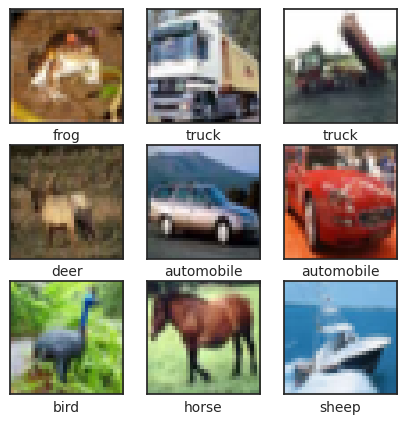

In [30]:
np.random.seed(42)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'sheep', 'truck']
sample_size = 9
rand_idx = np.random.randint(x_train_full.shape[0] + x_test.shape[0], size=sample_size)

plt.figure(figsize=(5, 5))

for i, idx in enumerate(rand_idx):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_full[i])
    plt.xlabel(class_names[int(y_train_full[i])])

plt.show()

In [31]:
x_train_full = x_train_full / 255
x_test = x_test / 255

In [32]:
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=.3, random_state=42)

In [33]:
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(35000, 32, 32, 3) (35000, 1)
(15000, 32, 32, 3) (15000, 1)
(10000, 32, 32, 3) (10000, 1)


## 모델 구성 및 컴파일

In [34]:
def model_build():
    inp = Input(shape=(32, 32, 3))

    out = Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(inp)
    out = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(out)

    out = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(out)
    out = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(out)

    out = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(out)
    out = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(out)

    out = Flatten()(out)
    out = Dense(256, activation='relu')(out)
    out = Dense(128, activation='relu')(out)
    out = Dense(10, activation='softmax')(out)

    model = Model(inputs=inp, outputs=out)

    model.compile(
        optimizer=Adam(learning_rate=1e-4),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [35]:
model = model_build()

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 128)         7385

## 모델 학습 및 평가

In [36]:
hist = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=256,
    validation_data=(x_val, y_val)
)

Epoch 1/50


2024-01-15 15:18:50.409815: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-01-15 15:18:50.643625: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-15 15:18:51.282328: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-15 15:18:51.411890: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f79d0340dd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-15 15:18:51.412009: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
2024-01-15 15:18:51.437173: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1705299531.576879   18751 device_compil

137/137 [==============================] - 7s 23ms/step - loss: 2.0365 - accuracy: 0.2751 - val_loss: 1.7871 - val_accuracy: 0.3628
Epoch 2/50
137/137 [==============================] - 2s 12ms/step - loss: 1.6956 - accuracy: 0.3979 - val_loss: 1.6218 - val_accuracy: 0.4249
Epoch 3/50
137/137 [==============================] - 2s 12ms/step - loss: 1.5616 - accuracy: 0.4387 - val_loss: 1.5304 - val_accuracy: 0.4533
Epoch 4/50
137/137 [==============================] - 2s 13ms/step - loss: 1.4798 - accuracy: 0.4689 - val_loss: 1.4392 - val_accuracy: 0.4869
Epoch 5/50
137/137 [==============================] - 2s 11ms/step - loss: 1.4147 - accuracy: 0.4956 - val_loss: 1.3857 - val_accuracy: 0.5102
Epoch 6/50
137/137 [==============================] - 2s 11ms/step - loss: 1.3669 - accuracy: 0.5132 - val_loss: 1.3591 - val_accuracy: 0.5152
Epoch 7/50
137/137 [==============================] - 2s 12ms/step - loss: 1.3275 - accuracy: 0.5297 - val_loss: 1.3273 - val_accuracy: 0.5275
Epoch 8/50

## 학습 과정 시각화

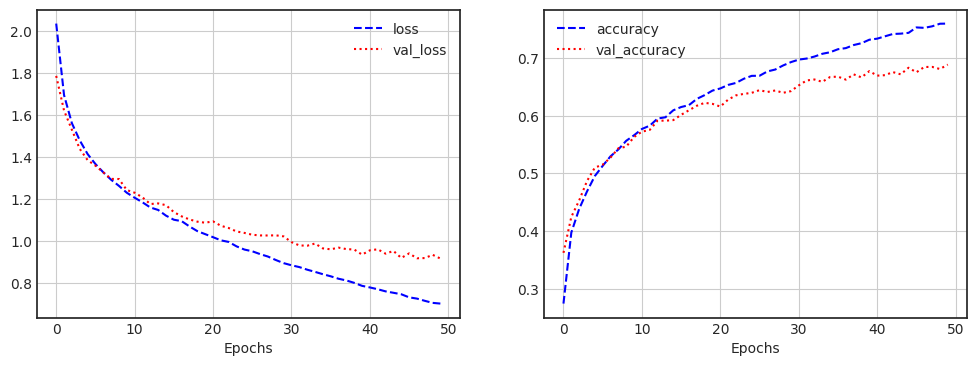

In [38]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], 'b--', label='loss')
plt.plot(hist.history['val_loss'], 'r:', label='val_loss')

plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'], 'b--', label='accuracy')
plt.plot(hist.history['val_accuracy'], 'r:', label='val_accuracy')

plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

- 해당 모델은 성능이 좋지 않음.
- 규제화, 드롭아웃 등 과대 적합을 방지하는 기술이 필요

In [39]:
def model_build2():
    inp = Input(shape=(32, 32, 3))

    out = Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(inp)
    out = BatchNormalization()(out)
    out = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(out)

    out = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(out)
    out = BatchNormalization()(out)
    out = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(out)

    out = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(out)
    out = BatchNormalization()(out)
    out = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(out)
    out = Dropout(0.5)(out)

    out = Flatten()(out)
    out = Dense(256, activation='relu')(out)
    out = Dropout(0.5)(out)
    out = Dense(128, activation='relu')(out)
    out = Dropout(0.5)(out)
    out = Dense(10, activation='softmax')(out)

    model = Model(inputs=inp, outputs=out)

    model.compile(
        optimizer=Adam(learning_rate=1e-4),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [40]:
model2 = model_build2()

model2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 64)        256 

## 모델 학습 및 평가

In [42]:
hist2 = model2.fit(
    x_train, y_train,
    epochs=50,
    batch_size=256,
    validation_data=(x_val, y_val)
)

Epoch 1/50


2024-01-15 15:28:22.291294: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_3/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


137/137 [==============================] - 8s 28ms/step - loss: 3.2739 - accuracy: 0.1397 - val_loss: 3.2186 - val_accuracy: 0.1263
Epoch 2/50
137/137 [==============================] - 3s 18ms/step - loss: 2.2967 - accuracy: 0.1732 - val_loss: 3.5843 - val_accuracy: 0.1741
Epoch 3/50
137/137 [==============================] - 2s 17ms/step - loss: 2.1758 - accuracy: 0.2091 - val_loss: 2.2947 - val_accuracy: 0.2441
Epoch 4/50
137/137 [==============================] - 2s 17ms/step - loss: 2.0851 - accuracy: 0.2463 - val_loss: 1.8544 - val_accuracy: 0.3773
Epoch 5/50
137/137 [==============================] - 2s 17ms/step - loss: 2.0087 - accuracy: 0.2760 - val_loss: 1.7784 - val_accuracy: 0.4223
Epoch 6/50
137/137 [==============================] - 2s 16ms/step - loss: 1.9264 - accuracy: 0.3055 - val_loss: 1.7215 - val_accuracy: 0.4553
Epoch 7/50
137/137 [==============================] - 2s 17ms/step - loss: 1.8673 - accuracy: 0.3295 - val_loss: 1.6376 - val_accuracy: 0.4705
Epoch 8/50

## 학습 과정 시각화

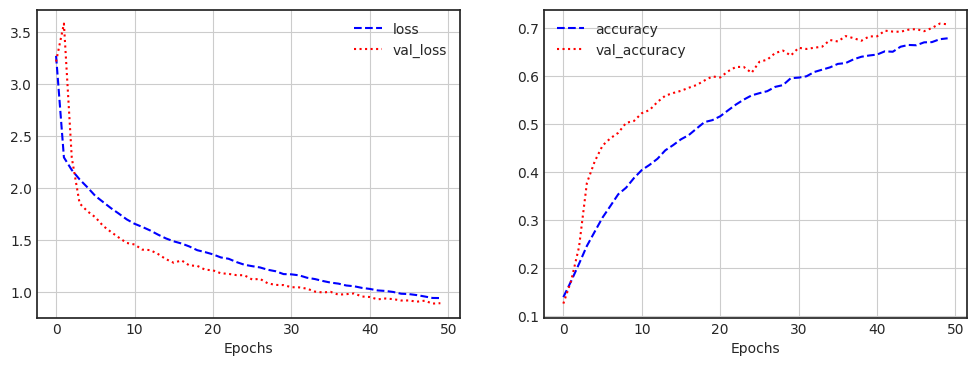

In [43]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist2.history['loss'], 'b--', label='loss')
plt.plot(hist2.history['val_loss'], 'r:', label='val_loss')

plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist2.history['accuracy'], 'b--', label='accuracy')
plt.plot(hist2.history['val_accuracy'], 'r:', label='val_accuracy')

plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()